# MatplotQuiz

In [2]:
# 쥬피터노트북 셀 스타일 조절 
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 100% !important; }</style>"))

# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')



In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib
# matplotlib의 pyplot을 사용한다.
import matplotlib.pyplot as plt

# 매직 명령어 => jupyter notebook에서 그래프 삽입 기능 
%matplotlib inline
# 관련 라이브러리 임포트 
# 한글이 깨져 나오는것을 방지하기위해서 
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

#  한글글꼴로 변경
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
# 한글 폰트 지정 
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.style.use('ggplot')

# Quiz1 : 인구수와  CCTV 

```
1) CCTV_in_Seoul.csv 파일을 데이타프레임으로 생성하여라
2) 기관명을 구별로 컬럼명을 변경하여라 
3) 최근증가율 컬럼을 추가하여라.
  최근증가율 = ((2016+2015+2014) / 2013년도이전)*100 
4) population_in_Seoul.xls 파일을 데이타프레임으로 생성하여라 
( header=2, usecols=B,D,G,J,N') 으로 한다. 

5) 4번의 데이타프레임에서 컬럼명을 변경하여라 
  구별, 인구수, 한국인, 외국인, 고령자 
6) 4번의 데이타프레임에서 1행과 결측값이 있는 행을 삭제하여라 
7) 4번의 데이타프레임에서 외국인 비율과 고령자 비율의 컬럼을 추가하여라.
8) 3번의 데이타프레임과 7번의 데이타프레임을 
   구별 컬럼을 기준으로 이너조인하여라 
   
   pd.merge(left = DF1 , right = DF2, how = "inner", on = "공통컬럼이름")
   
9) 8번의 데이타프레임에서 년도 컬럼을 모두 삭제하여라
10) 구별 컬럼을 인덱스로 변경하여라 
11) cctv 수치를 기준으로 가로막대 그래프를 출력하여라
12) 외국인 비율이 가장 많은 구 3개를 파이 그래프 형태로 출력하여라. 
(파이그래프 표시 형태 => 한국인과 외국인 비율)

```

## 1) CCTV_in_Seoul.csv 파일을 데이타프레임으로 생성하여라
df = pd.read_csv('data/CCTV_in_Seoul.csv')
df.sample(3)

In [4]:
df = pd.read_csv('data/CCTV_in_Seoul.csv')
df.sample(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
12,마포구,574,314,118,169,379
0,강남구,2780,1292,430,584,932
8,노원구,1265,542,57,451,516


In [5]:
df.isnull().sum()

기관명          0
소계           0
2013년도 이전    0
2014년        0
2015년        0
2016년        0
dtype: int64

In [6]:
df.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

## 2) 기관명을 구별로 컬럼명을 변경하여라 
df.columns

### df.rename(columns={"기관명": "구별"}, inplace=True)
df = df.rename(columns={"기관명": "구별"})

In [7]:
df = df.rename(columns={"기관명": "구별"})

In [8]:
df.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


## 3) 최근증가율 컬럼을 추가하여라.
  최근증가율 = ((2016+2015+2014) / 2013년도이전)*100 

In [9]:
# 최근증가율 = ((2016+2015+2014) / 2013년도이전)*100 
df['최근증가율'] = ((df['2014년'] + df['2015년'] + df['2016년'])/df['2013년도 이전'])*100

In [10]:
df.sample(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
10,동대문구,1294,1070,23,198,579,74.766355
24,중랑구,660,509,121,177,109,79.960707
14,서초구,1930,1406,157,336,398,63.371266


## 4) population_in_Seoul.xls 파일을 데이타프레임으로 생성하여라 
```
# ( header=2, usecols=B,D,G,J,N') 으로 한다. 
# usecols = B, D, G, J, N 은 엑셀에서 칼럼명 
```

In [11]:
df_pop = pd.read_excel('data/population_in_Seoul.xls', header=2, usecols='B,D,G,J,N')
df_pop.sample(3)

,자치구,계,계.1,계.2,65세이상고령자
19,영등포구,402985.0,368072.0,34913.0,52413.0
22,서초구,450310.0,445994.0,4316.0,51733.0
26,NaN,NaN,NaN,NaN,NaN


## 5) 구별, 인구수, 한국인, 외국인, 고령자 추출

In [12]:
df_pop.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
df_pop.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


## 6) 4번의 데이터프레임에서 1행과 결측값이 있는 행을 삭제하여라

In [13]:
df_pop.drop([0], inplace=True)
df_pop.head(2)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [14]:
df_pop[df_pop.isnull()['구별']]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [15]:
df_pop.dropna(how='all', inplace=True)

In [16]:
df_pop.isnull().sum()

구별     0
인구수    0
한국인    0
외국인    0
고령자    0
dtype: int64

## 7) 4번의 데이터프레임에서 외국인 비율과 고령자 비율의 컬럼을 추가하여라

In [17]:
df_pop['외국인 비율'] = df_pop['외국인']/df_pop['인구수']
df_pop['고령자 비율'] = df_pop['고령자']/df_pop['인구수']
df_pop.head(3)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,0.056695,0.156154
2,중구,133240.0,124312.0,8928.0,20764.0,0.067007,0.155839
3,용산구,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364


## 8) 3번의 데이타프레임과 7번의 데이타프레임을 구별 컬럼을 기준으로 이너조인하여라 

In [19]:
# pd.merge(left = DF1 , right = DF2, how = "inner", on = "공통컬럼이름")
df2 = pd.merge(left = df , right = df_pop, how = "inner", on = "구별")
df2.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


## 9) 8번의 데이타프레임에서 년도 컬럼을 모두 삭제하여라

In [20]:
df2.drop(columns=['2013년도 이전', '2014년', '2015년', '2016년'], axis=1, inplace=True)
df2.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


## 10) 구별 컬럼을 인덱스로 변경하여라

In [21]:
# 소계를 기준으로 정렬
df2.sort_values(by='소계', ascending=False)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
18,양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.008394,0.110370
14,서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.009585,0.114883
21,은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.008991,0.146310
20,용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364
6,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,0.070080,0.126895
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553
16,성북구,1464,63.627354,461260.0,449773.0,11487.0,64692.0,0.024904,0.140251
10,동대문구,1294,74.766355,369496.0,354079.0,15417.0,54173.0,0.041724,0.146613
8,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.006707,0.126349


In [24]:
df2.set_index('구별', inplace=True)
df2.head()

KeyError: "None of ['구별'] are in the columns"

## 11) CCTV 수치를 기준으로 가로막대 그래프를 출력하여라

In [25]:
df2['소계'].sort_values(ascending=False)

구별
강남구     2780
양천구     2034
서초구     1930
은평구     1873
용산구     1624
구로구     1561
관악구     1496
성북구     1464
동대문구    1294
노원구     1265
동작구     1091
성동구     1062
금천구     1015
종로구     1002
서대문구     962
영등포구     904
강서구      884
강동구      773
강북구      748
광진구      707
중구       671
중랑구      660
송파구      618
마포구      574
도봉구      485
Name: 소계, dtype: int64

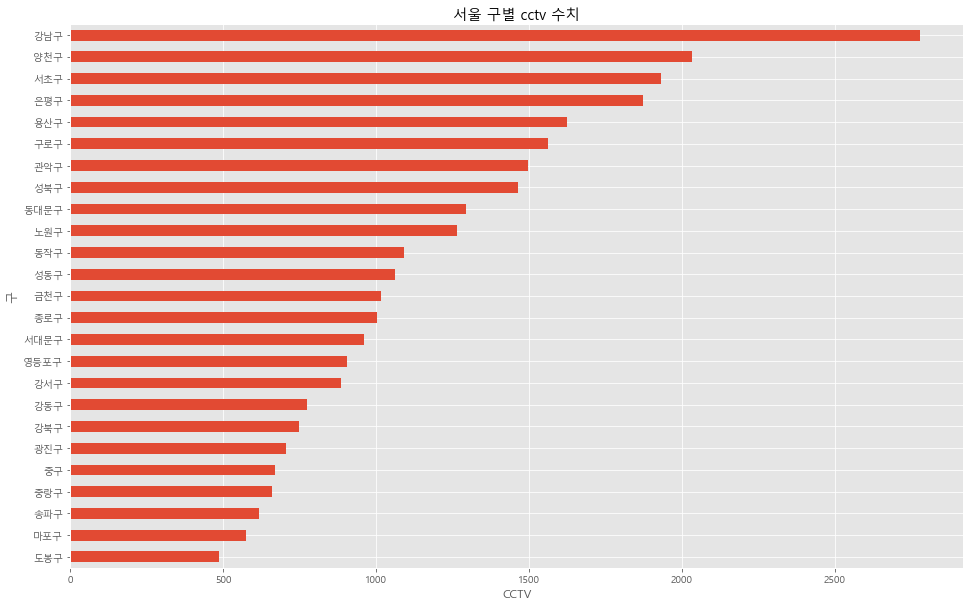

In [27]:
ax = df2['소계'].sort_values(ascending=True).plot( kind='barh', 
                                                    figsize=(16,10), 
                                                    label='CCTV 수치', title='서울 구별 cctv 수치',
                                                    )
# ax.legend(loc='upper right')

# 축 제목 설정
ax.set_xlabel('CCTV');
ax.set_ylabel('구');

## 12) 외국인 비율이 가장 많은 구 3개를 파이 그래프 형태로 출력하여라.

In [28]:
df2['외국인 비율'].sort_values(ascending=False)

구별
영등포구    0.086636
금천구     0.073423
구로구     0.070080
중구      0.067007
용산구     0.060388
종로구     0.056695
동대문구    0.041724
광진구     0.040179
서대문구    0.037232
관악구     0.034846
동작구     0.029245
마포구     0.028444
성동구     0.025266
성북구     0.024904
중랑구     0.011148
강서구     0.010805
강북구     0.010618
송파구     0.010336
서초구     0.009585
강동구     0.009298
은평구     0.008991
강남구     0.008677
양천구     0.008394
노원구     0.006707
도봉구     0.005785
Name: 외국인 비율, dtype: float64

In [29]:
index_list = df2['외국인 비율'].sort_values(ascending=False).index[:3]
index_list

Index(['영등포구', '금천구', '구로구'], dtype='object', name='구별')

<Figure size 432x288 with 0 Axes>

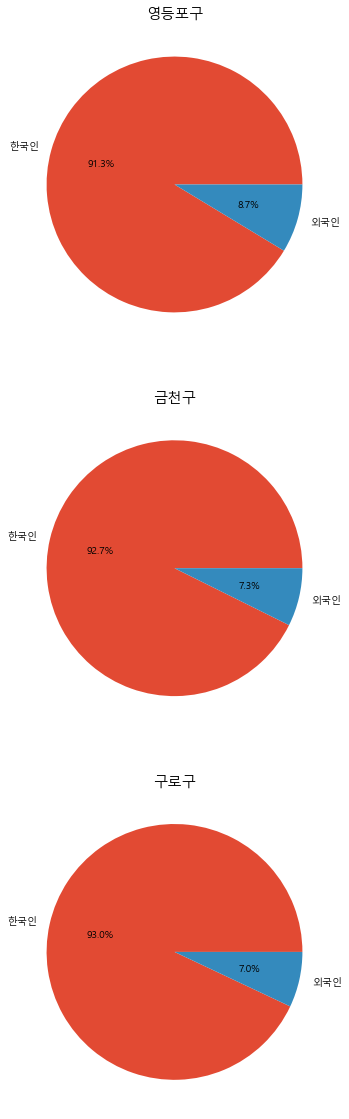

In [30]:
fig = plt.figure();
fig, ax = plt.subplots(3,1, figsize=(20,20));
ax[0].pie(df2.loc[index_list[0], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%' );
ax[1].pie(df2.loc[index_list[1], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%');
ax[2].pie(df2.loc[index_list[2], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%');
ax[0].set_title(index_list[0]);
ax[1].set_title(index_list[1]);
ax[2].set_title(index_list[2]);
# plt.suptitle('외국인 비율 TOP3');
# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=1);
plt.show();

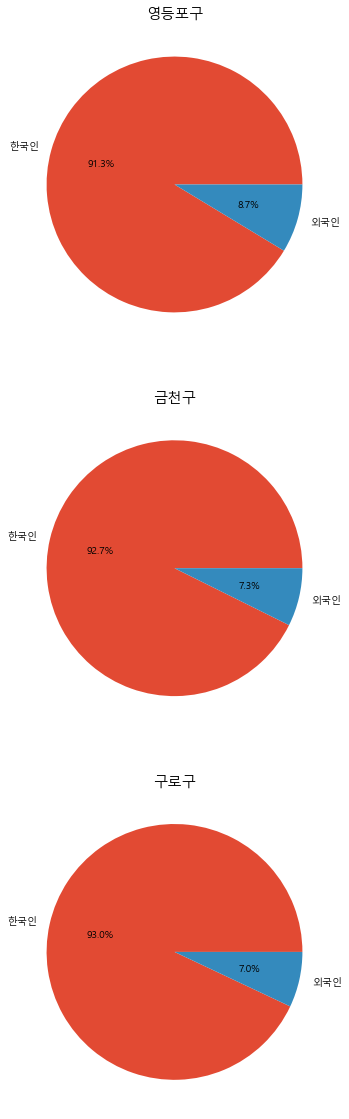

In [31]:
fig = plt.figure(figsize=(20,20));

plt.subplot(311)
plt.pie(df2.loc[index_list[0], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%' );
plt.title(index_list[0])

plt.subplot(312)
plt.pie(df2.loc[index_list[1], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%' );
plt.title(index_list[1])

plt.subplot(313)
plt.pie(df2.loc[index_list[2], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%' );
plt.title(index_list[2])

# plt.suptitle('외국인 비율 TOP3');

plt.show();